# Translating sizes to ages

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Length - mass relationship

$$
M_w = aL^b \iff L = (\frac{M_w}{a})^\frac{1}{b}
$$

In [2]:
def mass(length, a=np.exp(2.51), b=2.59):
    """ Given the length (in mm) returns the mass (in ug)"""
    return a * length**b

def length(mass, a=np.exp(2.51), b=2.59):
    """ Given the mass (in ug) returns the length (in mm)"""
    return (mass / a)**(1/b)

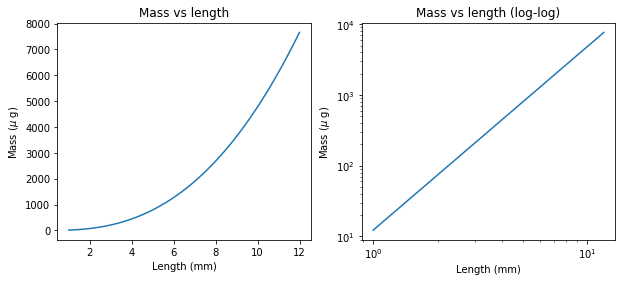

In [3]:
ls = np.arange(1, 12, 0.01)
ms = mass(ls)

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(10)

ax[0].plot(ls, ms);
ax[0].set_title('Mass vs length')
ax[0].set_xlabel('Length (mm)');
ax[0].set_ylabel(r'Mass ($\mu$ g)');

ax[1].plot(ls, ms)
ax[1].set_title('Mass vs length (log-log)')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Length (mm)');
ax[1].set_ylabel(r'Mass ($\mu$ g)');

## Dry mass - wet mass relationship

$$
M_d = \alpha M_w \iff M_w = \frac{M_d}{\alpha}
$$

In [4]:
def dry(mass_wet, alpha=0.2):
    """ Given the wet mass (in ug) returns the dry mass (in ug) """
    return alpha*mass_wet

def wet(mass_dry, alpha=0.2):
    """ Given the dry mass (in ug) returns the wet mass (in ug) """
    return mass_dry / alpha

## Age - wet mass relationship

$$
M_w = \frac{a}{1 + e^{-b(t-t_0)}} \iff t = t_0 - \frac{1}{b} \ln (\frac{a}{M_w} - 1)
$$

In [5]:
def mass_from_age(age, a=65, b=0.0315, t0=170):
    """ Given the age (in days) returns the wet mass (in mg)"""
    return a / (1 + np.exp(-b*(age - t0)))

def age_from_mass(mass, a=65, b=0.0315, t0=170):
    """ Given the wet mass (in mg) returns the age (in days)"""
    return t0 - 1/b * np.log(a/mass - 1)

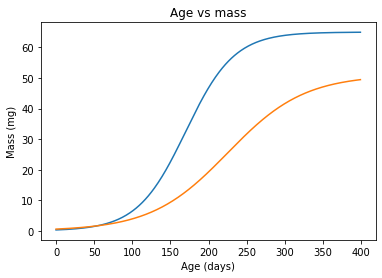

In [6]:
ages = np.arange(0, 400, 1)
plt.plot(ages, mass_from_age(ages));
plt.plot(ages, mass_from_age(ages, a=51, b=0.0199, t0=225));
plt.title('Age vs mass');
plt.xlabel('Age (days)');
plt.ylabel('Mass (mg)');